COMPREHENSIVE BENIGN IoT DATASET ANALYSIS

[STEP 1] Loading cleaned benign data...
✓ Dataset loaded: 362,342 rows × 39 columns
✓ Memory usage: 107.81 MB

[STEP 2] Dataset Overview and Quality Assessment...

[STEP 3] Statistical Analysis...

[STEP 4] Analyzing Network Traffic Patterns...


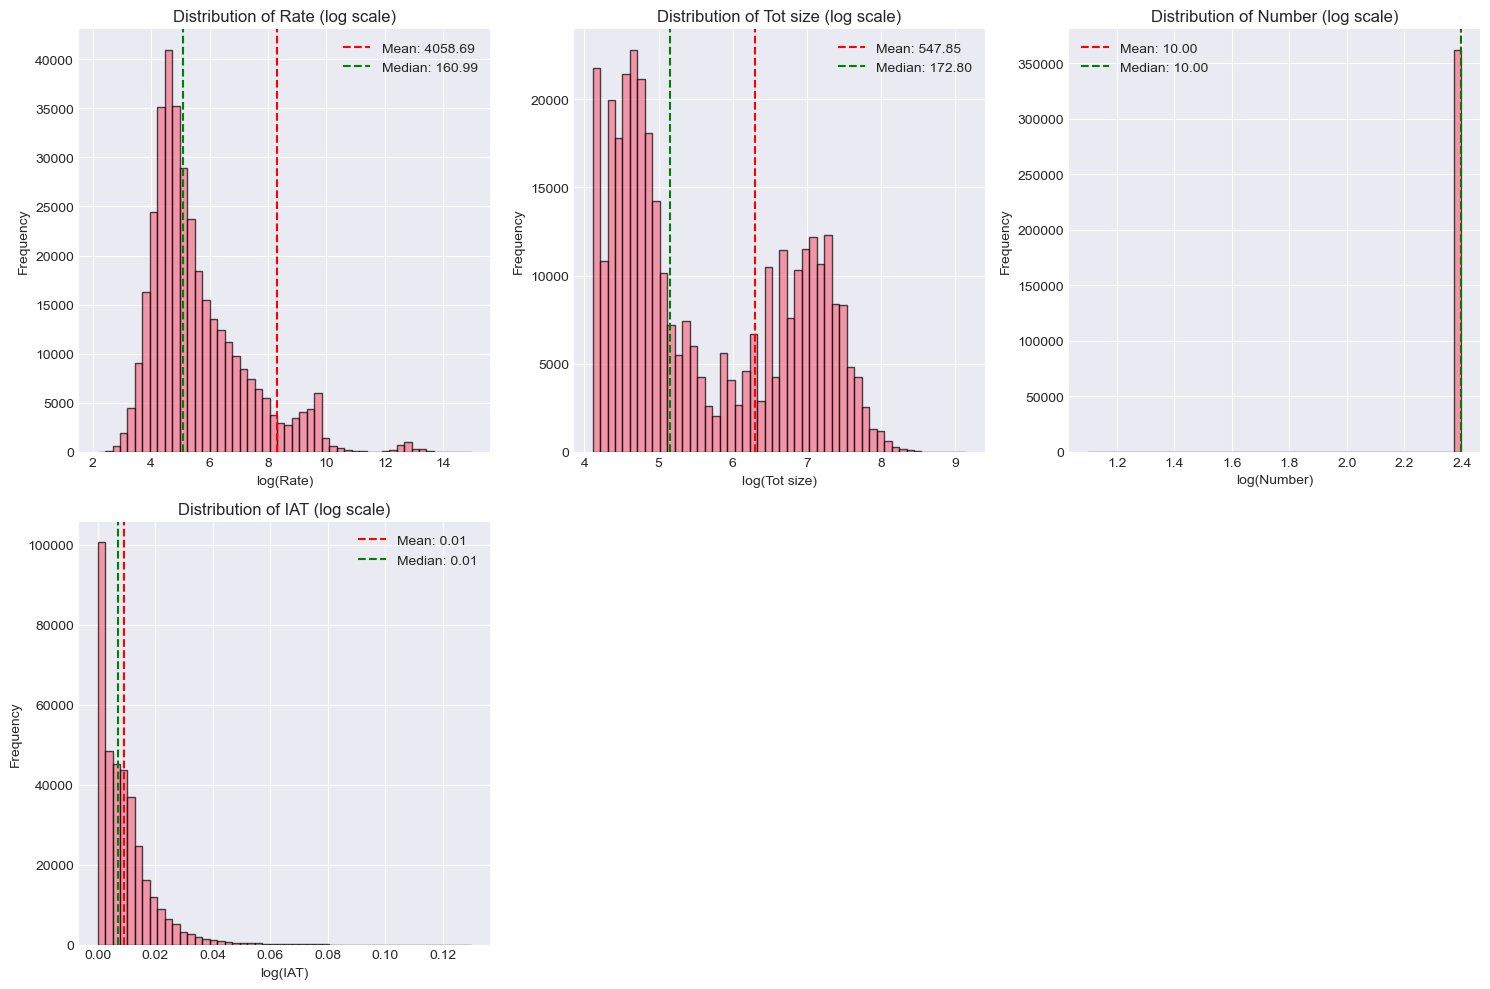


[STEP 5] Correlation Analysis...


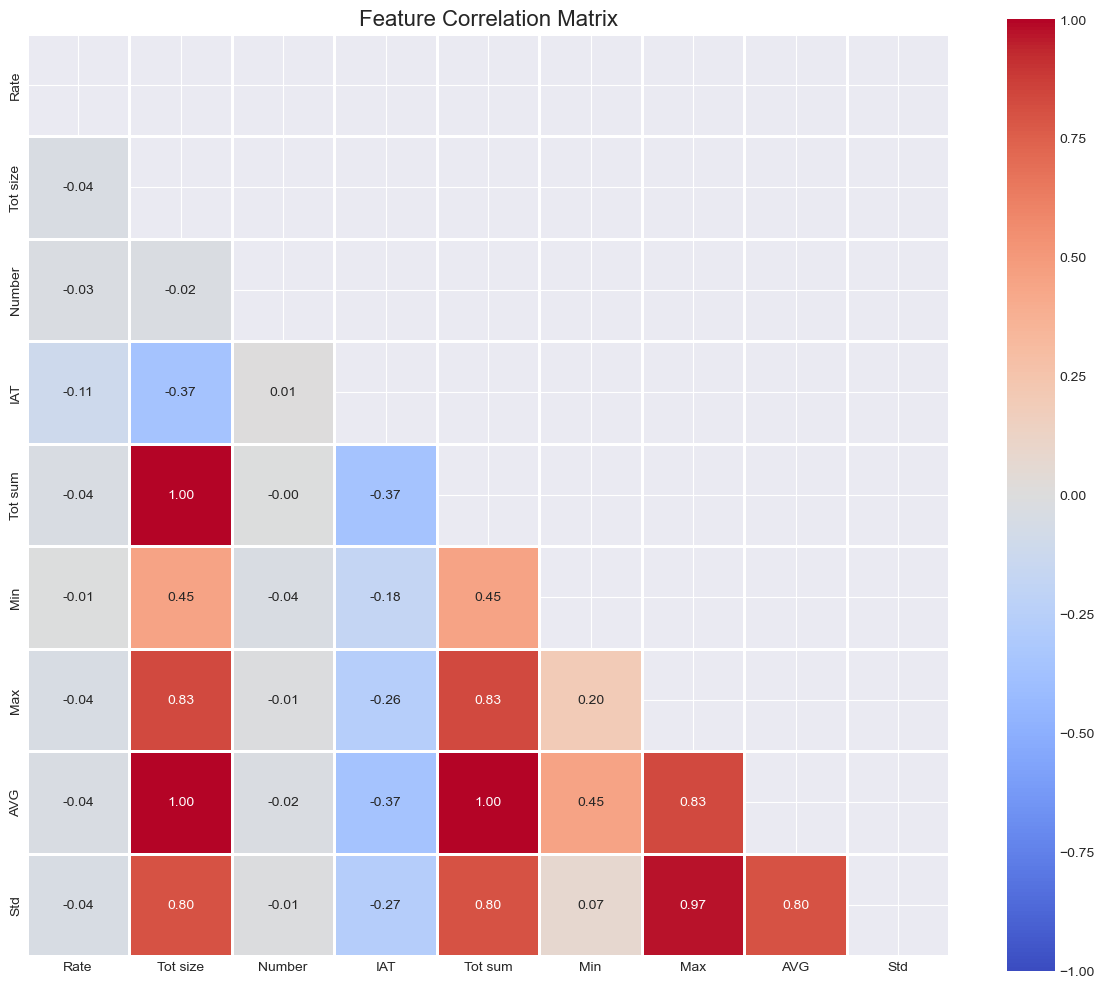


[STEP 6] Temporal Analysis...


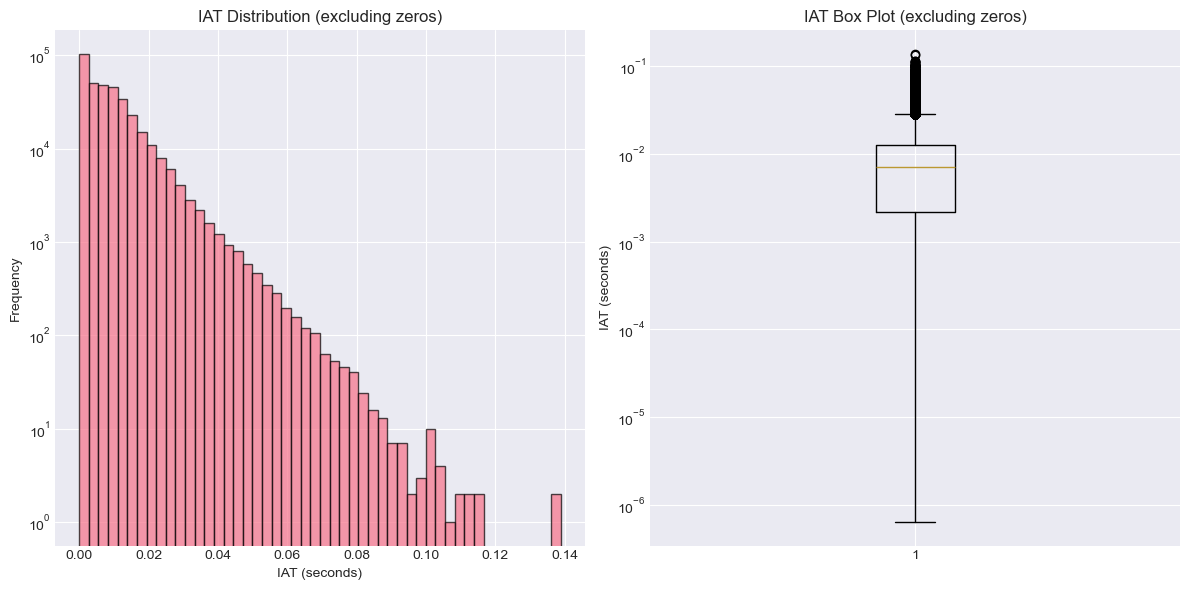


[STEP 7] Protocol and Flag Analysis...


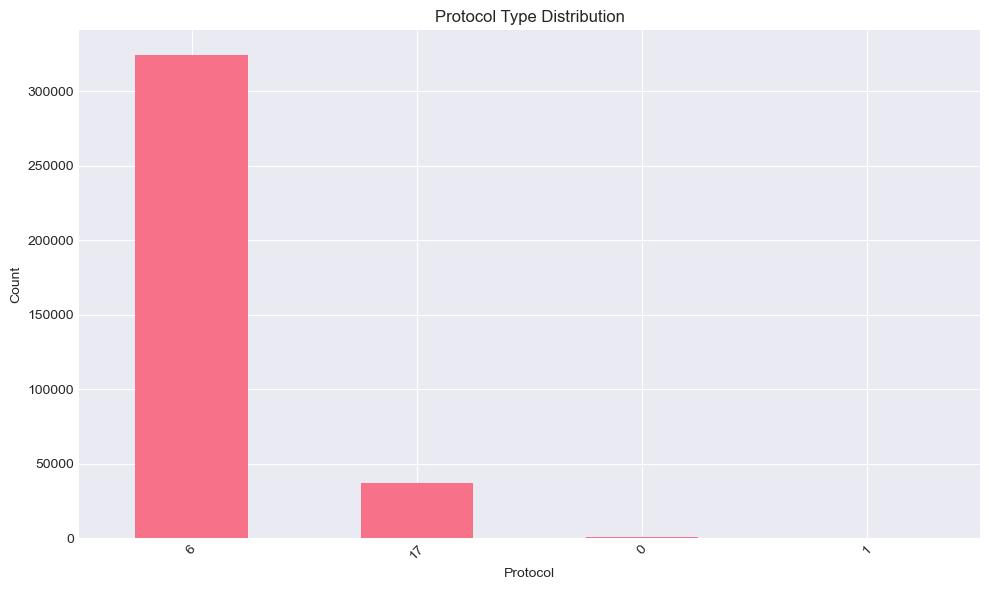


[STEP 8] Analyzing Natural Outliers in Benign Data...

[STEP 9] Feature Importance Analysis...


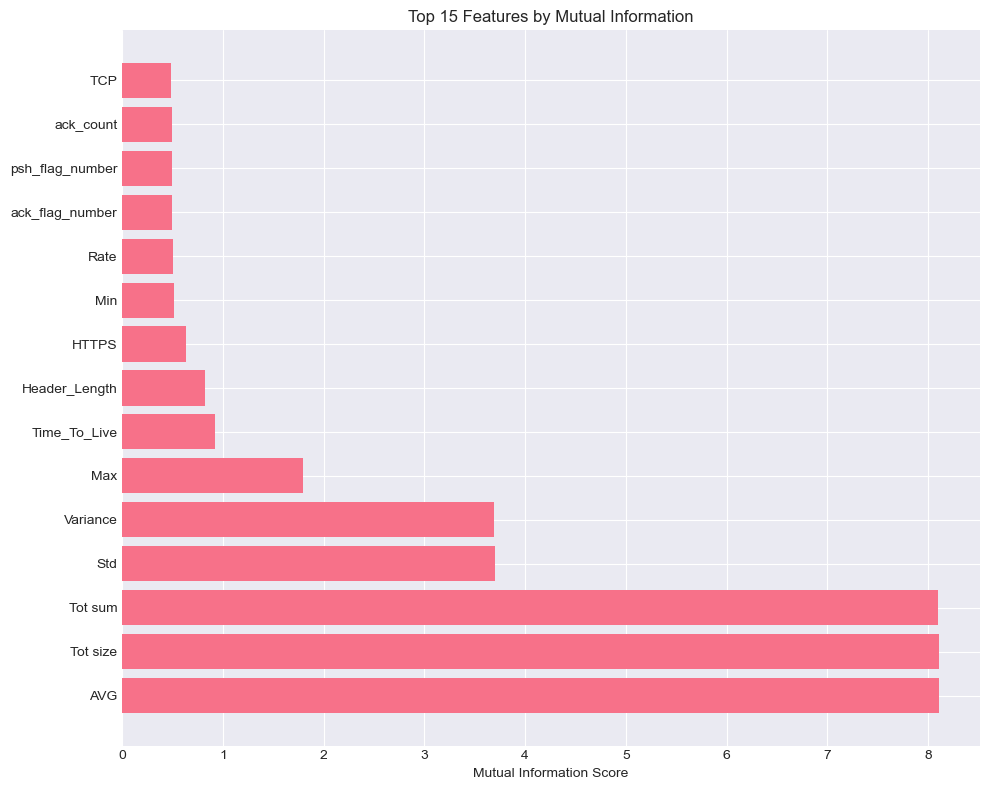


[STEP 10] Principal Component Analysis...


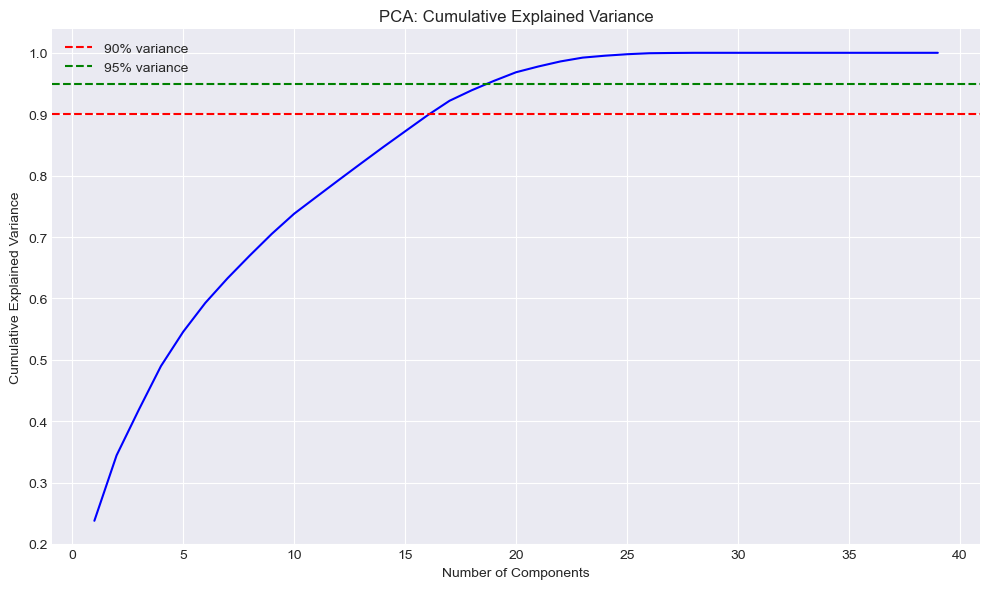


[STEP 11] Behavioral Pattern Analysis...

[STEP 12] Generating Recommendations...

[FINAL] Saving comprehensive analysis report...
✓ Analysis complete! Report saved to: ../../results/benign_insights.md
✓ Visualizations saved to: ../../results/Benign_Results/

ANALYSIS SUMMARY
Total Features Analyzed: 39
Highly Skewed Features: 26
High Variance Features: 26
Strong Correlations Found: 10
PCA Components (90% var): 17


In [1]:
# =====================================================================
# COMPREHENSIVE BENIGN IoT DATASET ANALYSIS
# =====================================================================
# This script performs an in-depth analysis of the benign IoT dataset,
# generating insights that will form the foundation of our anomaly
# detection system. Results are saved to a markdown report.
# =====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("COMPREHENSIVE BENIGN IoT DATASET ANALYSIS")
print("=" * 70)

# =====================================================================
# STEP 1: LOAD DATA AND INITIAL EXPLORATION
# =====================================================================
print("\n[STEP 1] Loading cleaned benign data...")
benign_df_path = '../../results/clean_data/benign_df.csv'
df = pd.read_csv(benign_df_path)

print(f"✓ Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"✓ Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Initialize markdown report
report_content = []
report_content.append("# Comprehensive Benign IoT Dataset Analysis Report\n")
report_content.append(f"**Generated on:** {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
report_content.append("---\n")

# =====================================================================
# STEP 2: DATASET OVERVIEW AND QUALITY ASSESSMENT
# =====================================================================
print("\n[STEP 2] Dataset Overview and Quality Assessment...")

# Basic statistics
report_content.append("## 1. Dataset Overview\n")
report_content.append(f"- **Total Records:** {df.shape[0]:,}\n")
report_content.append(f"- **Total Features:** {df.shape[1]}\n")
report_content.append(f"- **Memory Usage:** {df.memory_usage().sum() / 1024**2:.2f} MB\n")

# Data types distribution
dtype_counts = df.dtypes.value_counts()
report_content.append("\n### 1.1 Feature Types\n")
for dtype, count in dtype_counts.items():
    report_content.append(f"- **{dtype}:** {count} features\n")

# Missing values check
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    report_content.append("\n✅ **No missing values detected**\n")
else:
    report_content.append("\n⚠️ **Missing values detected:**\n")
    for col, count in missing_values[missing_values > 0].items():
        report_content.append(f"- {col}: {count} ({count/len(df)*100:.2f}%)\n")

# =====================================================================
# STEP 3: STATISTICAL ANALYSIS
# =====================================================================
print("\n[STEP 3] Statistical Analysis...")

# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Advanced statistics
report_content.append("\n## 2. Statistical Analysis\n")
report_content.append("### 2.1 Key Statistical Measures\n")

# Calculate advanced statistics
stats_df = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Std Dev': df[numeric_cols].std(),
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurtosis(),
    'CV (%)': (df[numeric_cols].std() / df[numeric_cols].mean() * 100)
})

# Identify highly skewed features
highly_skewed = stats_df[abs(stats_df['Skewness']) > 2].index.tolist()
report_content.append(f"\n**Highly Skewed Features ({len(highly_skewed)}):** {', '.join(highly_skewed[:5])}...")

# Identify high variance features
high_cv = stats_df[stats_df['CV (%)'] > 100].index.tolist()
report_content.append(f"\n**High Variance Features ({len(high_cv)}):** {', '.join(high_cv[:5])}...")

# =====================================================================
# STEP 4: NETWORK TRAFFIC PATTERNS
# =====================================================================
print("\n[STEP 4] Analyzing Network Traffic Patterns...")

report_content.append("\n## 3. Network Traffic Patterns\n")

# Key network metrics
key_metrics = ['Rate', 'Tot size', 'Number', 'IAT', 'Duration']
available_metrics = [m for m in key_metrics if m in df.columns]

if available_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, metric in enumerate(available_metrics[:6]):
        ax = axes[i]
        
        # Log transform for better visualization
        data = df[metric].replace(0, 0.001)  # Avoid log(0)
        ax.hist(np.log1p(data), bins=50, alpha=0.7, edgecolor='black')
        ax.set_title(f'Distribution of {metric} (log scale)')
        ax.set_xlabel(f'log({metric})')
        ax.set_ylabel('Frequency')
        
        # Add statistics
        mean_val = df[metric].mean()
        median_val = df[metric].median()
        ax.axvline(np.log1p(mean_val), color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        ax.axvline(np.log1p(median_val), color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        ax.legend()
    
    # Hide empty subplots
    for i in range(len(available_metrics), 6):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('../../results/Benign_Results/traffic_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Traffic pattern insights
    report_content.append("### 3.1 Key Findings\n")
    for metric in available_metrics:
        mean_val = df[metric].mean()
        median_val = df[metric].median()
        std_val = df[metric].std()
        report_content.append(f"\n**{metric}:**\n")
        report_content.append(f"- Mean: {mean_val:.2f}\n")
        report_content.append(f"- Median: {median_val:.2f}\n")
        report_content.append(f"- Std Dev: {std_val:.2f}\n")
        report_content.append(f"- Skewness: {stats_df.loc[metric, 'Skewness']:.2f}\n")

# =====================================================================
# STEP 5: CORRELATION ANALYSIS
# =====================================================================
print("\n[STEP 5] Correlation Analysis...")

# Select top features for correlation analysis
correlation_features = ['Rate', 'Tot size', 'Number', 'IAT', 'Duration', 
                       'Tot sum', 'Min', 'Max', 'AVG', 'Std']
correlation_features = [f for f in correlation_features if f in df.columns]

if len(correlation_features) > 2:
    corr_matrix = df[correlation_features].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, vmin=-1, vmax=1,
                square=True, linewidths=1)
    plt.title('Feature Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.savefig('../../results/Benign_Results/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Find strong correlations
    report_content.append("\n## 4. Feature Correlations\n")
    report_content.append("### 4.1 Strong Correlations (|r| > 0.7)\n")
    
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                strong_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if strong_corr:
        for item in strong_corr[:10]:  # Top 10
            report_content.append(f"- **{item['Feature 1']}** ↔ **{item['Feature 2']}**: {item['Correlation']:.3f}\n")
    else:
        report_content.append("No strong correlations found (|r| > 0.7)\n")

# =====================================================================
# STEP 6: TEMPORAL ANALYSIS
# =====================================================================
print("\n[STEP 6] Temporal Analysis...")

report_content.append("\n## 5. Temporal Patterns\n")

# Analyze IAT (Inter-Arrival Time) patterns
if 'IAT' in df.columns:
    # IAT statistics
    iat_stats = {
        'Mean IAT': df['IAT'].mean(),
        'Median IAT': df['IAT'].median(),
        'Max IAT': df['IAT'].max(),
        'Min IAT': df['IAT'].min(),
        '% Zero IAT': (df['IAT'] == 0).sum() / len(df) * 100
    }
    
    report_content.append("### 5.1 Inter-Arrival Time Analysis\n")
    for key, value in iat_stats.items():
        report_content.append(f"- **{key}:** {value:.4f}\n")
    
    # IAT distribution
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(df['IAT'][df['IAT'] > 0], bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel('IAT (seconds)')
    plt.ylabel('Frequency')
    plt.title('IAT Distribution (excluding zeros)')
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df['IAT'][df['IAT'] > 0])
    plt.ylabel('IAT (seconds)')
    plt.title('IAT Box Plot (excluding zeros)')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.savefig('../../results/Benign_Results/iat_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# =====================================================================
# STEP 7: PROTOCOL AND FLAG ANALYSIS
# =====================================================================
print("\n[STEP 7] Protocol and Flag Analysis...")

report_content.append("\n## 6. Protocol and Flag Analysis\n")

# Protocol distribution
if 'Protocol Type' in df.columns:
    protocol_dist = df['Protocol Type'].value_counts()
    
    plt.figure(figsize=(10, 6))
    protocol_dist.plot(kind='bar')
    plt.title('Protocol Type Distribution')
    plt.xlabel('Protocol')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../../results/Benign_Results/protocol_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    report_content.append("### 6.1 Protocol Distribution\n")
    for proto, count in protocol_dist.items():
        report_content.append(f"- **Protocol {proto}:** {count:,} ({count/len(df)*100:.2f}%)\n")

# Flag analysis
flag_columns = [col for col in df.columns if 'flag' in col.lower()]
if flag_columns:
    report_content.append("\n### 6.2 TCP Flag Analysis\n")
    
    flag_stats = {}
    for flag in flag_columns:
        active_count = (df[flag] > 0).sum()
        flag_stats[flag] = {
            'Active Count': active_count,
            'Active %': active_count / len(df) * 100,
            'Mean when Active': df[df[flag] > 0][flag].mean() if active_count > 0 else 0
        }
    
    for flag, stats in flag_stats.items():
        report_content.append(f"\n**{flag}:**\n")
        report_content.append(f"- Active in {stats['Active Count']:,} flows ({stats['Active %']:.2f}%)\n")
        if stats['Active Count'] > 0:
            report_content.append(f"- Mean count when active: {stats['Mean when Active']:.2f}\n")

# =====================================================================
# STEP 8: OUTLIER DETECTION WITHIN BENIGN DATA
# =====================================================================
print("\n[STEP 8] Analyzing Natural Outliers in Benign Data...")

report_content.append("\n## 7. Natural Outliers in Benign Traffic\n")

# Use IQR method to find outliers
outlier_features = ['Rate', 'Tot size', 'IAT', 'Duration']
outlier_features = [f for f in outlier_features if f in df.columns]

outlier_counts = {}
for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)
    
    report_content.append(f"\n**{feature} Outliers:**\n")
    report_content.append(f"- Count: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)\n")
    report_content.append(f"- IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]\n")

# =====================================================================
# STEP 9: FEATURE IMPORTANCE ANALYSIS
# =====================================================================
print("\n[STEP 9] Feature Importance Analysis...")

report_content.append("\n## 8. Feature Importance for Anomaly Detection\n")

# Calculate mutual information
if 'Tot size' in df.columns and len(numeric_cols) > 5:
    # Use Tot size as proxy target for importance
    mi_scores = mutual_info_regression(
        df[numeric_cols].fillna(0), 
        df['Tot size'],
        random_state=42
    )
    
    mi_df = pd.DataFrame({
        'Feature': numeric_cols,
        'MI Score': mi_scores
    }).sort_values('MI Score', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(10, 8))
    top_features = mi_df.head(15)
    plt.barh(top_features['Feature'], top_features['MI Score'])
    plt.xlabel('Mutual Information Score')
    plt.title('Top 15 Features by Mutual Information')
    plt.tight_layout()
    plt.savefig('../../results/Benign_Results/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    report_content.append("### 8.1 Top Features by Mutual Information\n")
    for _, row in mi_df.head(10).iterrows():
        report_content.append(f"- **{row['Feature']}:** {row['MI Score']:.3f}\n")

# =====================================================================
# STEP 10: PCA ANALYSIS
# =====================================================================
print("\n[STEP 10] Principal Component Analysis...")

# Perform PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols].fillna(0))

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calculate cumulative variance
cumvar = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumvar >= 0.90) + 1
n_components_95 = np.argmax(cumvar >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumvar) + 1), cumvar, 'b-')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../../results/Benign_Results/pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

report_content.append("\n## 9. Dimensionality Reduction Insights\n")
report_content.append(f"- **Components for 90% variance:** {n_components_90}\n")
report_content.append(f"- **Components for 95% variance:** {n_components_95}\n")
report_content.append(f"- **First 3 components explain:** {cumvar[2]*100:.2f}% of variance\n")

# =====================================================================
# STEP 11: BEHAVIORAL CLUSTERING INSIGHTS
# =====================================================================
print("\n[STEP 11] Behavioral Pattern Analysis...")

report_content.append("\n## 10. Key Behavioral Patterns\n")

# Identify different traffic patterns
if 'Rate' in df.columns and 'Tot size' in df.columns:
    # Define traffic categories
    df['Traffic_Category'] = 'Normal'
    df.loc[(df['Rate'] > df['Rate'].quantile(0.75)) & 
           (df['Tot size'] > df['Tot size'].quantile(0.75)), 'Traffic_Category'] = 'High Volume'
    df.loc[(df['Rate'] > df['Rate'].quantile(0.75)) & 
           (df['Tot size'] <= df['Tot size'].quantile(0.75)), 'Traffic_Category'] = 'High Frequency'
    df.loc[(df['Rate'] <= df['Rate'].quantile(0.25)) & 
           (df['Tot size'] <= df['Tot size'].quantile(0.25)), 'Traffic_Category'] = 'Low Activity'
    
    traffic_dist = df['Traffic_Category'].value_counts()
    
    report_content.append("### 10.1 Traffic Categories\n")
    for category, count in traffic_dist.items():
        report_content.append(f"- **{category}:** {count:,} ({count/len(df)*100:.2f}%)\n")

# =====================================================================
# STEP 12: RECOMMENDATIONS FOR ANOMALY DETECTION
# =====================================================================
print("\n[STEP 12] Generating Recommendations...")

report_content.append("\n## 11. Recommendations for Anomaly Detection\n")

report_content.append("### 11.1 Feature Engineering Suggestions\n")
report_content.append("- **Log Transformation:** Apply to highly skewed features (Rate, Tot size, IAT)\n")
report_content.append("- **Interaction Features:** Create Rate × Tot_size, Duration × Number\n")
report_content.append("- **Time-based Features:** Extract hour patterns from IAT distributions\n")
report_content.append("- **Protocol-specific Features:** Separate models for different protocols\n")

report_content.append("\n### 11.2 Model Selection Recommendations\n")
report_content.append("- **Isolation Forest:** Good baseline for high-dimensional data\n")
report_content.append("- **Autoencoders:** For capturing complex normal patterns\n")
report_content.append("- **LSTM-based:** For temporal sequence modeling\n")
report_content.append("- **Ensemble Approach:** Combine multiple models for robustness\n")

report_content.append("\n### 11.3 Evaluation Strategy\n")
report_content.append("- **Contamination Rate:** Start with 1-2% based on natural outliers\n")
report_content.append("- **Validation:** Use time-based splits for temporal consistency\n")
report_content.append("- **Metrics:** Focus on precision at low FPR (< 1%)\n")
report_content.append("- **Real-time Constraints:** Consider model inference time\n")

# =====================================================================
# SAVE REPORT
# =====================================================================
print("\n[FINAL] Saving comprehensive analysis report...")

report_path = '../../results/benign_insights.md'
with open(report_path, 'w') as f:
    f.writelines(report_content)

print(f"✓ Analysis complete! Report saved to: {report_path}")
print("✓ Visualizations saved to: ../../results/Benign_Results/")

# Display summary statistics
print("\n" + "="*70)
print("ANALYSIS SUMMARY")
print("="*70)
print(f"Total Features Analyzed: {len(numeric_cols)}")
print(f"Highly Skewed Features: {len(highly_skewed)}")
print(f"High Variance Features: {len(high_cv)}")
print(f"Strong Correlations Found: {len(strong_corr) if 'strong_corr' in locals() else 0}")
print(f"PCA Components (90% var): {n_components_90}")
print("="*70)